In [1]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_b5273d14f75640a0afcd4a52ec9bed61 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='ps0xEKeFwJGL9TYrVq-GIA4qNHjJRi6M6_LyHgwrlzWm',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu.cloud-object-storage.appdomain.cloud')

body = client_b5273d14f75640a0afcd4a52ec9bed61.get_object(Bucket='power-donotdelete-pr-1u4gekpajyv7ui',Key='Household_power_consumption.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266670
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333336
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566666
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt


In [4]:
df_data_1.head()


,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266670
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333336
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566666
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


In [5]:
df_data_1.tail()


,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
2075254,2010-11-26 20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0,15.766666
2075255,2010-11-26 20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0,15.733334
2075256,2010-11-26 21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0,15.633333
2075257,2010-11-26 21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0,15.566667
2075258,2010-11-26 21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0,15.533334


In [6]:
print(f"the dataset has {df_data_1.shape[0]} rows and {df_data_1.shape[1]} columns")


the dataset has 2075259 rows and 9 columns


In [7]:
df_data_1.columns


Index(['datetime', 'Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'sub_metering_4'],
      dtype='object')

In [8]:
#dataset['new_date']=[d.date() for d in dataset['datetime']]
#dataset['new_time']=[d.time() for d in dataset['datetime']]


In [9]:
df_data_1.describe()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.089418e+00,1.236871e-01,2.408364e+02,4.618401e+00,1.118474e+00,1.291131e+00,6.448635e+00,9.298722e+00
std,1.054678e+00,1.125933e-01,3.240051e+00,4.433165e+00,6.141460e+00,5.796922e+00,8.433584e+00,9.561278e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-2.400000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.800000e+00
50%,6.020000e-01,1.000000e-01,2.410000e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.500000e+00
75%,1.526000e+00,1.940000e-01,2.428700e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,1.036667e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,1.248333e+02


In [10]:
df_data_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   datetime               object 
 1   Global_active_power    float64
 2   Global_reactive_power  float64
 3   Voltage                float64
 4   Global_intensity       float64
 5   Sub_metering_1         float64
 6   Sub_metering_2         float64
 7   Sub_metering_3         float64
 8   sub_metering_4         float64
dtypes: float64(8), object(1)
memory usage: 142.5+ MB


In [11]:
df_data_1.head()


,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266670
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333336
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566666
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


In [12]:
#dataset.drop('datetime',axis='columns',inplace=True)


In [13]:
df_data_1.head()


,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266670
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333336
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566666
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


In [14]:
df_data_1.isnull().sum()


datetime                 0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
sub_metering_4           0
dtype: int64

In [15]:
percent_missing = df_data_1.isnull().sum() * 100 / len(df_data_1)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})



In [16]:
missing_value_df


,percent_missing
datetime,0.0
Global_active_power,0.0
Global_reactive_power,0.0
Voltage,0.0
Global_intensity,0.0
Sub_metering_1,0.0
Sub_metering_2,0.0
Sub_metering_3,0.0
sub_metering_4,0.0


In [17]:
df_data_1.describe()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.089418e+00,1.236871e-01,2.408364e+02,4.618401e+00,1.118474e+00,1.291131e+00,6.448635e+00,9.298722e+00
std,1.054678e+00,1.125933e-01,3.240051e+00,4.433165e+00,6.141460e+00,5.796922e+00,8.433584e+00,9.561278e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-2.400000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.800000e+00
50%,6.020000e-01,1.000000e-01,2.410000e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.500000e+00
75%,1.526000e+00,1.940000e-01,2.428700e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,1.036667e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,1.248333e+02


In [18]:
df_data_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   datetime               object 
 1   Global_active_power    float64
 2   Global_reactive_power  float64
 3   Voltage                float64
 4   Global_intensity       float64
 5   Sub_metering_1         float64
 6   Sub_metering_2         float64
 7   Sub_metering_3         float64
 8   sub_metering_4         float64
dtypes: float64(8), object(1)
memory usage: 142.5+ MB


In [19]:
df_data_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   datetime               object 
 1   Global_active_power    float64
 2   Global_reactive_power  float64
 3   Voltage                float64
 4   Global_intensity       float64
 5   Sub_metering_1         float64
 6   Sub_metering_2         float64
 7   Sub_metering_3         float64
 8   sub_metering_4         float64
dtypes: float64(8), object(1)
memory usage: 142.5+ MB


/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Global_active_power', ylabel='Density'>

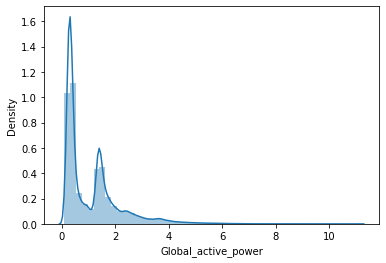

In [20]:
sn.distplot(df_data_1['Global_active_power'])


/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Global_active_power'>

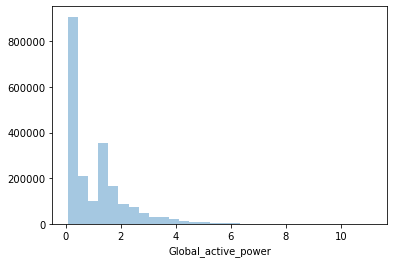

In [21]:
sn.distplot(df_data_1['Global_active_power'],kde=False,bins=30)


<AxesSubplot:xlabel='Global_reactive_power'>

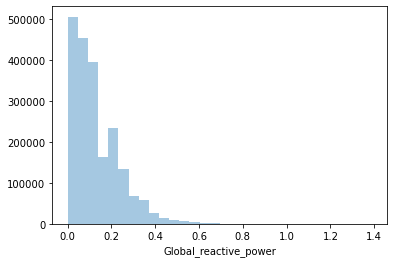

In [22]:
sn.distplot(df_data_1['Global_reactive_power'],kde=False,bins=30)


<AxesSubplot:xlabel='Voltage', ylabel='Density'>

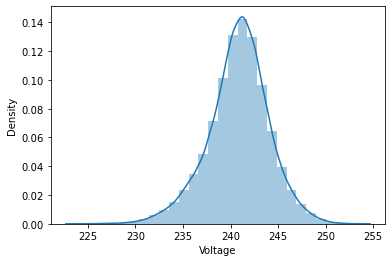

In [23]:
sn.distplot(df_data_1['Voltage'],kde=True,bins=30)


/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Global_intensity'>

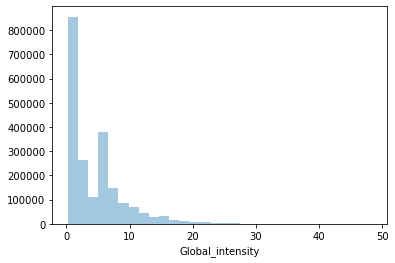

In [24]:
sn.distplot(df_data_1['Global_intensity'],kde=False,bins=30)


In [25]:
df_data_1.corr()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
Global_active_power,1.000000,0.247088,-0.396853,0.998884,0.484110,0.434012,0.638966,0.700756
Global_reactive_power,0.247088,1.000000,-0.110802,0.266219,0.123006,0.139321,0.089949,0.211442
Voltage,-0.396853,-0.110802,1.000000,-0.408480,-0.195018,-0.165702,-0.265935,-0.269298
Global_intensity,0.998884,0.266219,-0.408480,1.000000,0.489027,0.439780,0.626952,0.702647
Sub_metering_1,0.484110,0.123006,-0.195018,0.489027,1.000000,0.054468,0.101996,0.124699
Sub_metering_2,0.434012,0.139321,-0.165702,0.439780,0.054468,1.000000,0.081440,0.084800
Sub_metering_3,0.638966,0.089949,-0.265935,0.626952,0.101996,0.081440,1.000000,0.177762
sub_metering_4,0.700756,0.211442,-0.269298,0.702647,0.124699,0.084800,0.177762,1.000000


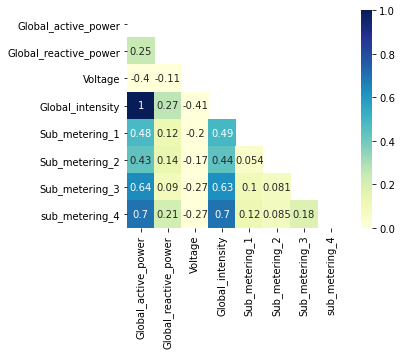

In [26]:
pearson=df_data_1.corr(method='pearson')
mask=np.zeros_like(pearson)
mask[np.triu_indices_from(mask)]=True
sn.heatmap(pearson,vmax=1,vmin=0,square=True,cbar=True,annot=True,cmap="YlGnBu",mask=mask);

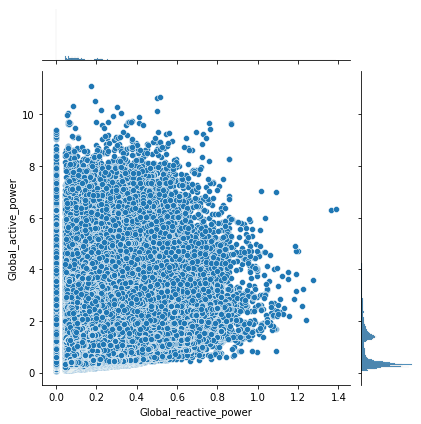

In [27]:
sn.jointplot(x='Global_reactive_power',y='Global_active_power',data=df_data_1,kind='scatter')


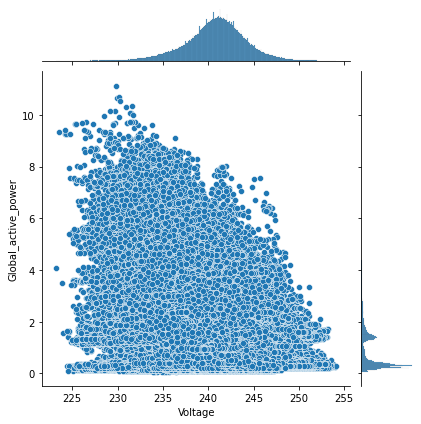

In [28]:
sn.jointplot(x='Voltage',y='Global_active_power',data=df_data_1,kind='scatter')


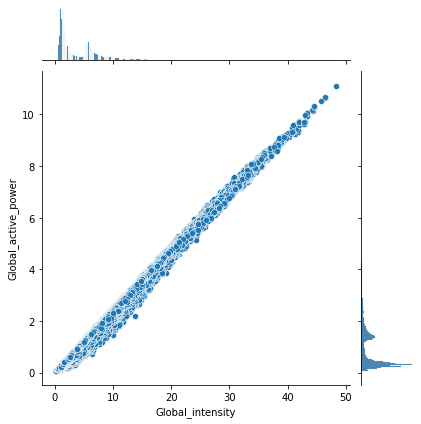

In [29]:
sn.jointplot(x='Global_intensity',y='Global_active_power',data=df_data_1,kind='scatter')


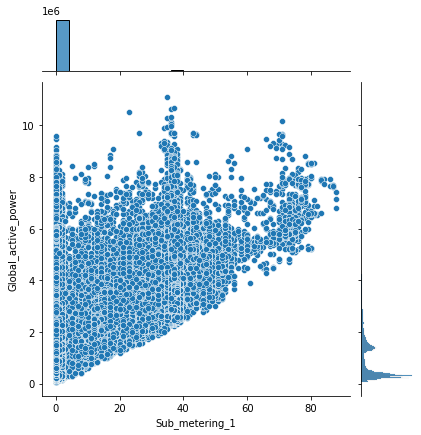

In [30]:
sn.jointplot(x='Sub_metering_1',y='Global_active_power',data=df_data_1,kind='scatter')


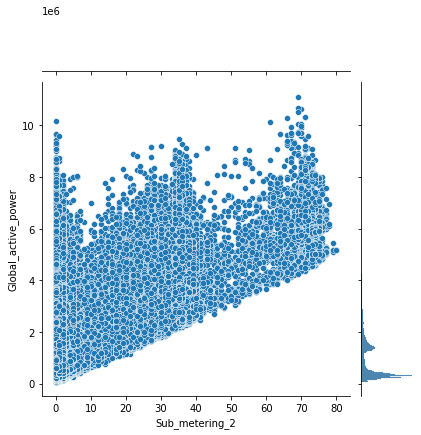

In [31]:
sn.jointplot(x='Sub_metering_2',y='Global_active_power',data=df_data_1,kind='scatter')


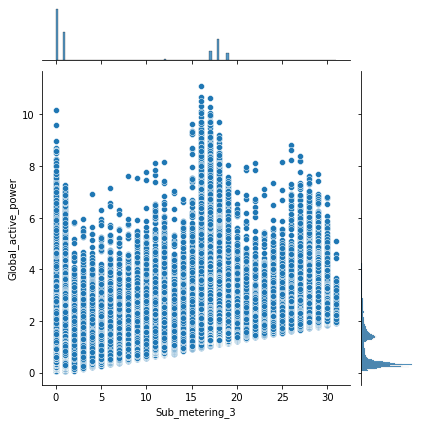

In [32]:
sn.jointplot(x='Sub_metering_3',y='Global_active_power',data=df_data_1,kind='scatter')


In [33]:
#pd.to_datetime(dataset.datetime,format="%y%d%m%H%M%S")


In [34]:
df_data_1.datetime=pd.to_datetime(df_data_1.datetime)


In [35]:
df_data_1.set_index("datetime",inplace=True)


In [36]:
x=df_data_1.iloc[:,[1,3,4,5,6]]
y=df_data_1.iloc[:,1]

In [37]:
x.head()


,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,
2006-12-16 17:24:00,0.418,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,0.436,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,0.498,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,0.502,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,0.528,15.8,0.0,1.0,17.0


In [38]:
y.head()


datetime
2006-12-16 17:24:00    0.418
2006-12-16 17:25:00    0.436
2006-12-16 17:26:00    0.498
2006-12-16 17:27:00    0.502
2006-12-16 17:28:00    0.528
Name: Global_reactive_power, dtype: float64

In [39]:
from sklearn.model_selection import train_test_split


In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)


In [41]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_train.shape)

(1452681, 5)
(622578, 5)
(1452681,)
(1452681,)


In [42]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_train.shape)

(1452681, 5)
(622578, 5)
(1452681,)
(1452681,)


In [43]:
from sklearn.linear_model import LinearRegression


In [44]:
lm=LinearRegression()


In [45]:
lm.fit(x_train,y_train)


LinearRegression()

In [46]:
predictions = lm.predict(x_test)


In [47]:
predictions


array([1.96570256e-16, 1.98091073e-16, 1.84000000e-01, ...,
       5.40000000e-02, 2.00226551e-16, 1.52000000e-01])

In [48]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('RSquarevalue:',metrics.r2_score(y_test,predictions))

MAE: 1.3741665880337786e-16
MSE: 3.261876406255018e-32
RMSE: 1.8060665564300277e-16
RSquarevalue: 1.0


In [49]:
import pickle
filename = 'PCASSS_model.pkl'
pickle.dump(lm,open(filename,'wb'))

In [50]:
import ibm_watson_machine_learning


In [51]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np


In [52]:
wml_credentials = {
    "apikey":"wxMf2hzLa5F5luWumDcO_dis7zhw15gLMh4KM2idMctY",
    "url" : "https://eu-gb.ml.cloud.ibm.com"
}

In [54]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -------  ------------------------
ID                                    NAME     CREATED
3e87f0a8-583a-4d93-85d7-5c5ff045e08d  power_c  2022-03-30T15:33:08.109Z
------------------------------------  -------  ------------------------


In [55]:
SPACE_ID="3e87f0a8-583a-4d93-85d7-5c5ff045e08d"

In [56]:
wml_client.set.default_space(SPACE_ID)


'SUCCESS'

In [57]:
MODEL_NAME = "power"
DEPLOYMENT_NAME ="power deployment"
BEST_MODEL = lm

In [58]:
software_spec_uid = wml_client.software_specifications.get_id_by_name("default_py3.8")

model_props = {
    wml_client.repository.ModelMetaNames.NAME:MODEL_NAME,
    wml_client.repository.ModelMetaNames.TYPE:'scikit-learn_0.23',
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID : software_spec_uid
    
}

In [59]:
model_details = wml_client.repository.store_model(
 model = BEST_MODEL,
meta_props = model_props,
training_data = x_train,
training_target =y_train,
)

Note: Warnings!! :  Software specification default_py3.8 specified for the wml_model is deprecated and will be removed in the future. We recommend you use runtime-22.1-py3.9 instead. For details see Supported Frameworks https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/pm_service_supported_frameworks.html


In [60]:
software_spec_uid


'ab9e1b80-f2ce-592c-a7d2-4f2344f77194'

In [61]:
model_uid = wml_client.repository.get_model_id(model_details)


In [62]:
model_uid


'f2e2f3bd-6c24-4f06-8f6a-94cc1ecfaba2'

In [63]:
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME,
    wml_client.deployments.ConfigurationMetaNames.ONLINE:{}
}

In [64]:
deployment = wml_client.deployments.create(artifact_uid=model_uid,meta_props=deployment_props)




#######################################################################################

Synchronous deployment creation for uid: 'f2e2f3bd-6c24-4f06-8f6a-94cc1ecfaba2' started

#######################################################################################


initializing
Note: Software specification default_py3.8 is deprecated. Use runtime-22.1-py3.9 software specification instead. For details, see https://dataplatform.cloud.ibm.com/docs/content/wsj/wmls/wmls-deploy-python-types.html?context=cpdaas.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='d16b98c0-d4a5-446c-9161-3eaad1825352'
------------------------------------------------------------------------------------------------


